In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate as spi
plt.style.use('seaborn-white')
%matplotlib inline

In [2]:
filename = 'data/zlens_M_table.csv'
df = pd.read_csv(filename)
df.head()

,DL,DLS,DS,M,comoving_lens,om_lambdas,raw_rs,rs,step,theta,z_lens
0,362.678499,83.042878,437.481996,4.776410e-08,398.946349,0.0,93.470646,492.416995,1.000000e-07,0.00001,0.1
1,362.678499,52.850933,410.312043,7.038919e-08,398.946349,0.0,58.984561,457.930910,1.000000e-07,0.00001,0.1
2,362.678499,38.757401,397.614947,9.301429e-08,398.946349,0.0,43.087080,442.033429,1.000000e-07,0.00001,0.1
3,362.678499,30.597443,390.273756,1.156394e-07,398.946349,0.0,33.938120,432.884469,1.000000e-07,0.00001,0.1
4,362.678499,25.275587,385.470993,1.382645e-07,398.946349,0.0,27.994813,426.941162,1.000000e-07,0.00001,0.1


In [3]:
df = df[df.om_lambdas == 0]
len(df)

402

In [4]:
# df = df[~((df.om_lambdas < 0.707144) & (df.om_lambdas > 0.707142))]

length_scale = 3.086e22
H_0 = 7.56e-27 * length_scale
# M = 1474e12 / length_scale

# def calc_theta(D_LS, D_L, D_S):
#     return np.sqrt(4*M*D_LS/D_L/D_S)

theta_second_order = []
theta_rindler = []
for index, row in df.iterrows():
    Lambda = 3*row.om_lambdas*H_0**2
    M = row.M
    rho = (1-row.om_lambdas)*3*H_0**2/(8*np.pi)
    r_h = (3*M/(4*np.pi*rho))**(1./3)

    coeff2 = [row.DS, 0, -4*M*row.DLS/row.DL, -15*np.pi*M**2/4*row.DLS/row.DL**2, -401/12*M**3*row.DLS/row.DL**3]
    roots2 = np.roots(coeff2)
    roots2 = roots2[roots2>0 & np.isreal(roots2)]
    th2 = np.real(roots2)
    second_order = th2[np.argmin(np.abs(row.theta - th2))]
    theta_second_order.append(second_order)


df['theta_second_order'] = theta_second_order
# ## removed percentage!!
df['percentage_diff'] = (df.theta_second_order - df.theta)/df.theta

In [5]:
df.head()

,DL,DLS,DS,M,comoving_lens,om_lambdas,raw_rs,rs,step,theta,z_lens,theta_second_order,percentage_diff
0,362.678499,83.042878,437.481996,4.776410e-08,398.946349,0.0,93.470646,492.416995,1.000000e-07,0.00001,0.1,0.00001,-1.382544e-06
1,362.678499,52.850933,410.312043,7.038919e-08,398.946349,0.0,58.984561,457.930910,1.000000e-07,0.00001,0.1,0.00001,8.509377e-06
2,362.678499,38.757401,397.614947,9.301429e-08,398.946349,0.0,43.087080,442.033429,1.000000e-07,0.00001,0.1,0.00001,1.452827e-05
3,362.678499,30.597443,390.273756,1.156394e-07,398.946349,0.0,33.938120,432.884469,1.000000e-07,0.00001,0.1,0.00001,6.217621e-07
4,362.678499,25.275587,385.470993,1.382645e-07,398.946349,0.0,27.994813,426.941162,1.000000e-07,0.00001,0.1,0.00001,8.220904e-06


In [6]:
stats = df[['M', 'percentage_diff']].groupby('M').agg(['mean', 'std', 'count'])
stats.columns = [' '.join(col).strip() for col in stats.columns.values]
stats['percentage_diff mean std'] = stats['percentage_diff std']/np.sqrt(stats['percentage_diff count'])
stats

,percentage_diff mean,percentage_diff std,percentage_diff count,percentage_diff mean std
M,,,,
4.776410e-08,0.000090,0.000081,22,0.000017
7.038919e-08,0.000093,0.000095,20,0.000021
9.301429e-08,0.000087,0.000084,20,0.000019
1.156394e-07,0.000073,0.000056,20,0.000012
1.382645e-07,0.000036,0.000042,20,0.000009
1.608896e-07,0.000077,0.000088,20,0.000020
1.835147e-07,0.000067,0.000069,20,0.000015
2.061398e-07,0.000051,0.000067,20,0.000015
2.287649e-07,0.000036,0.000063,20,0.000014


In [7]:
stats2 = df[['z_lens', 'percentage_diff']].groupby('z_lens').agg(['mean', 'std', 'count'])
stats2.columns = [' '.join(col).strip() for col in stats2.columns.values]
stats2['percentage_diff mean std'] = stats2['percentage_diff std']/np.sqrt(stats2['percentage_diff count'])
stats2

,percentage_diff mean,percentage_diff std,percentage_diff count,percentage_diff mean std
z_lens,,,,
0.100000,0.000004,0.000004,20,9.768084e-07
0.147368,0.000004,0.000007,20,1.509591e-06
0.194737,0.000011,0.000008,20,1.776441e-06
0.242105,0.000016,0.000014,20,3.135119e-06
0.289474,0.000016,0.000018,20,4.037573e-06
0.336842,0.000025,0.000022,20,4.830591e-06
0.384211,0.000030,0.000023,20,5.180638e-06
0.431579,0.000039,0.000028,20,6.311121e-06
0.478947,0.000042,0.000033,20,7.473533e-06


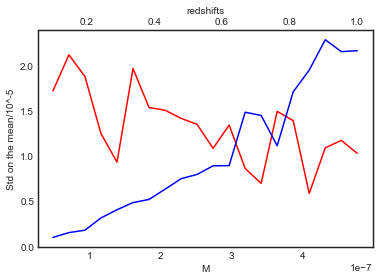

In [16]:
scale = 1e-5
fig, ax1 = plt.subplots()
ax1.plot(stats.index, stats['percentage_diff mean std']/scale, 'r')
ax1.set_xlabel("M")
ax1.set_ylabel("Std on the mean/10^-5")

ax2 = ax1.twiny()
ax2.plot(stats2.index, stats2['percentage_diff mean std']/scale, 'b')
ax2.set_xlabel("redshifts")
ax2.set_ylabel("Std on the mean/10^-5")